# This notebook is for homework 1 of ICS 635 Fall 2016
## By Edkins, Picot and Ludert 
### (Team PotatoClock) 

In [81]:
%matplotlib inline
import numpy as np
import random as rm
import matplotlib.pyplot as plt


# Here we define the datafaker function

## For now the datafaker will make a 2-d cloud point separated by a line. The line will have slope between -1 and 1 and intercep between -1 and 1 if random is chosen, else it will have the slope and intercep it is told

In [82]:
def data_faker(N, m, b, c=1, rand_div = 'yes'):
    
    if rand_div == 'yes':
        
        slope_sign_choice = rm.random()
        
        if slope_sign_choice < 0.5:
            m_sign = -1
        else:
            m_sign = 1
            
        m = m_sign * rm.random() 
        
        intercep_sign_choice = rm.random()
        
        if intercep_sign_choice < 0.5:
            b_sign = -1
        else:
            b_sign = 1
            
        b = b_sign * rm.random()
        
    points = np.empty([N,3])
    
    for i in range(N):
        
        x_sign_choice = rm.random()
        
        if x_sign_choice < 0.5:
            x_sign = -1
        else:
            x_sign = 1
            
        x_i = x_sign * rm.random() *c
        #---------------------------------------
        
        y_sign_choice = rm.random()
        
        if y_sign_choice < 0.5:
            y_sign = -1
        else:
            y_sign = 1
            
        y_i = y_sign * rm.random() *c
        #----------------------------------------
        
        if y_i < m*x_i+b:
            l_i = 1
        elif y_i > m*x_i+b:
            l_i = -1
            
        points[i,0] = x_i
        points[i,1] = y_i
        points[i,2] = l_i
         
    return points, m, b

def scatter_plot(points, m, b):
    
    color = np.empty([len(points)], dtype=str)

    for i in range(len(points)):
        if points[i,2] < 0:
            color[i] = 'r'
        else:
            color[i] = 'b'
            
    step = np.amax(points[:,0]) - np.amin(points[:,0])/100
    x_dummy = np.arange(np.amin(points[:,0]), np.amax(points[:,0])+step, step)
    y_dummy = np.empty_like(x_dummy)
    y_dummy[:] = np.multiply(m, x_dummy) + b

    plt.scatter(points[:,0], points[:,1], c = color)
    plt.plot(x_dummy,y_dummy)
    plt.show()


# Here we demostrate the use of the datafaker and the plotting

## The datafaker function returns a nX3 array where the first dimenstion id equal to the number of points, and the second dim represents the x, y and lab as well as the slope m and intercep b of the divinding line

### for points, m, b = data_faker(N, m, b, c, rand_div = 'yes') points is [N,3]
### points[i,0] is the x coord
###  points[i,1] is the y coord
###  points[i,2] is the lable

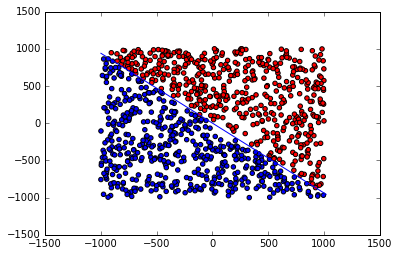

In [84]:
train_set, m, b = data_faker(1000, 0, 0, c=1000, rand_div = 'yes')

plot = scatter_plot(train_set, m, b)

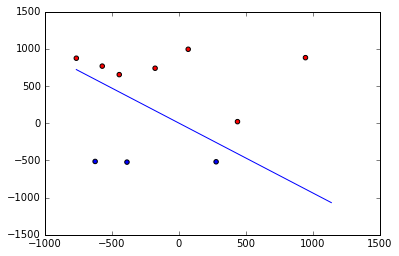

In [87]:
test_set, m, b = data_faker(10, m, b, c=1000, rand_div = 'no')

plot = scatter_plot(test_set, m, b)